In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(engine)
# reflect the tables
Base.metadata.tables
Base.metadata.create_all(engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Create inspector and inspect our columns in dataset
inspector=inspect(engine)

In [11]:
#get the columns and their types within the measurement table
columns=inspector.get_columns('measurement')
for column in columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#get the columns and their types within the measurement table
columns=inspector.get_columns('station')
for column in columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Find the most recent date in the data set.
most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [ ]:
previous_date = most_recent_date - timedelta(days=365)

precipitation_data = session.query(Precipitation).\
    filter(Precipitation.date >= previous_date).\
    filter(Precipitation.date <= current_date).\
    order_by(desc(Precipitation.date)).all()

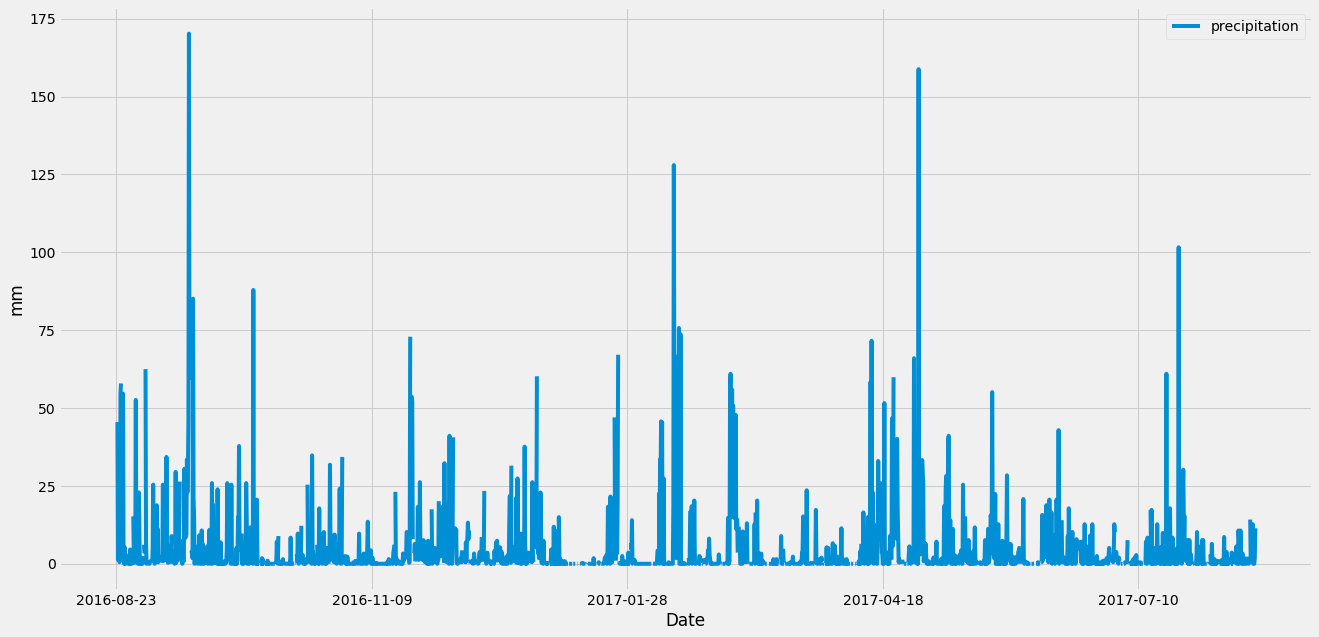

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_data=session.query(Measurement).order_by(Measurement.date.desc())

# Calculate the date one year from the last date in data set.

a_year_date = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= a_year_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation_scores , columns=['date' , 'precipitation'])

df.set_index('date', inplace=True)

# Sort the dataframe by date
sorted_df=df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(20, 10))
plt.xlabel('Date')
plt.ylabel('mm')
plt.show()


In [61]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats=df.describe()
print(summary_stats)

       precipitation
count    2021.000000
mean        4.505888
std        11.713487
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000


# Exploratory Station Analysis

In [65]:
# Design a query to calculate the total number stations in the dataset
total_num_station=session.query(Station).distinct().count()
print(total_num_station)

9


In [95]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station=session.query(Measurement.station ,func.count(Measurement.station)).group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).first()

print(f'The most active station is {most_active_station[0]} with the {most_active_station[1]} rows')



The most active station is USC00519281 with the 2772 rows


In [106]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel=[func.max(Measurement.tobs),
    func.min(Measurement.tobs),
    func.avg(Measurement.tobs)]
print(*sel)
active_session_info=session.query(*sel).filter(Measurement.station == "USC00519281").all()
active_session_info

max(measurement.tobs) min(measurement.tobs) avg(measurement.tobs)


[(29.4, 12.2, 22.03582251082252)]

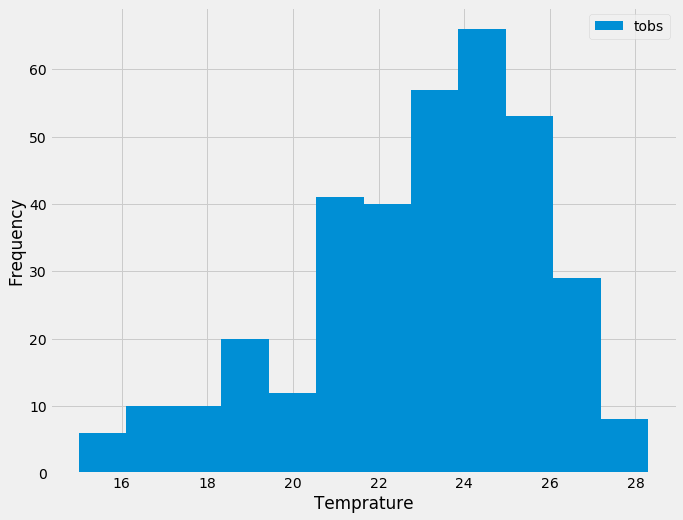

In [124]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_month=session.query(Measurement.station, Measurement.tobs, Measurement.date).\
        filter(Measurement.station == "USC00519281").\
        filter(Measurement.date >= a_year_date).all()
tem_obs_12_mon=pd.DataFrame(last_12_month , columns=["date" , "tobs" , "station"])
tem_obs_12_mon.plot.hist(bins=12 ,figsize=(10,8))
plt.xlabel('Temprature')
plt.show()


# Close session

In [125]:
# Close Session
session.close()